如果隨機向幾千個人提出一個複雜的問題，然後彙總他們的答案。在許多情況下，會發現這個彙總的答案比專家的答案還要好。這稱為**群體智慧（wisdom of the crowd）**。

如果彙總一组預測器（例如分類器或迴歸量）的預測，獲得的預測結果也比最佳的單個預測器要好。這樣的一組預測器稱為**集成（ensemble）**；因此，這種技術稱為**集成學習**，一個集成學習算法稱為**集成方法（Ensemble method）**。

例如，可以訓練一組決策樹分類器，每一棵樹都是基於訓練集不同的隨機子集進行訓練。做出預測時，只需獲得所有樹各自的預測，然後給出得票最多的類別作為預測結果。**這樣一組決策樹的集成被成為隨機森林**，儘管它很簡單，但它是當今最強大的機器學習算法之一。

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

# Voting Classifiers

假如已經訓練了一些分類器，每個分類器的準確率約為 80％。包括 Logistic 迴歸分類器，SVM 分類器，隨機森林分類器，K-Nearest Neighbors 分類器，也許還有一些其他。

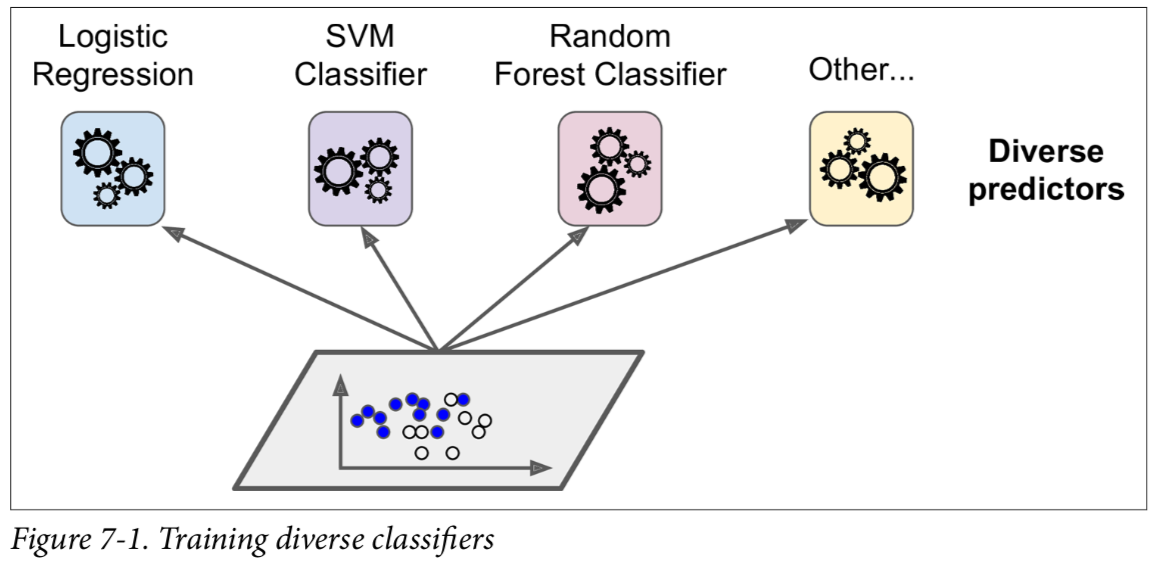

這時要創建一個更好的分類器，最簡單的方法是**聚合每個分類器的預測，然後將得票最多的結果作為預測的類別**。這種**大多數投票分類器稱為硬投票分類器**。

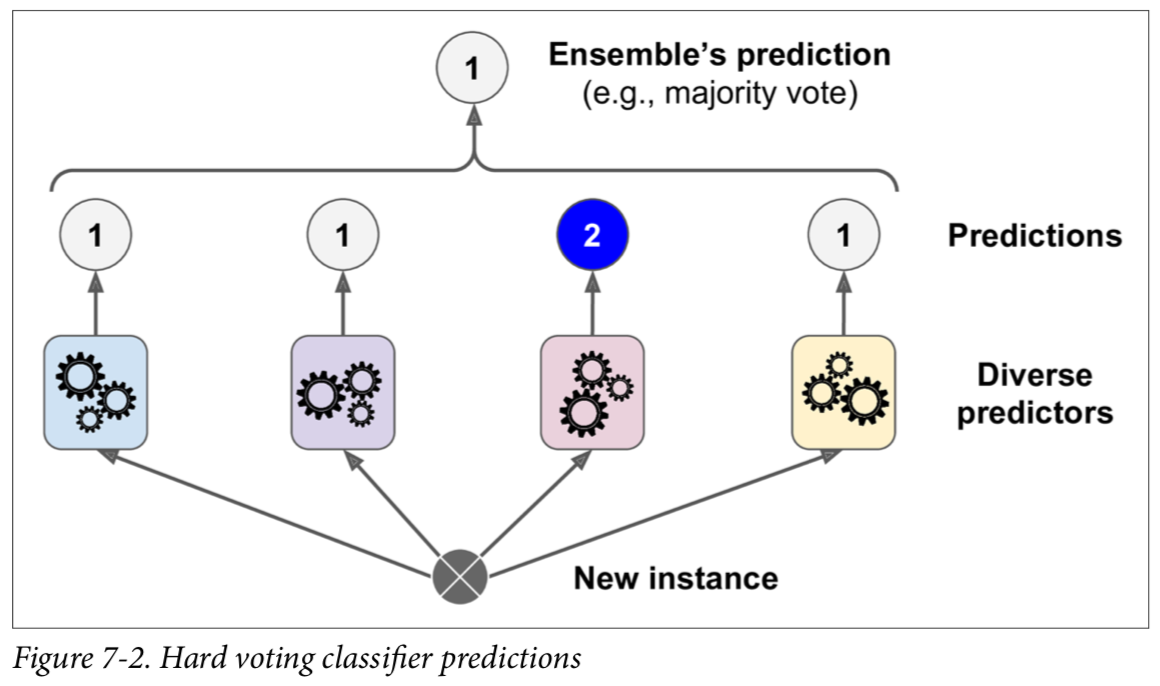

這種**投票分類器通常比集成中最好的分類器還要具有更高的準確率**。

即使每個分類器都是*弱學習器（weak learner）*（意味着它只比隨機猜測好一些），整體仍然可以實現一個強學習器（strong learner）（高準確率），只要有足夠大數量並且足夠多種類的弱學習器即可。

可以透過以下例子說明。假設有一個略微偏倚的硬幣，有 51％ 的可能正面數字朝上，49％ 的可能背面花朝上 。如果擲 1000 次，大致會得到差不多 510 次數字和 490 次花，所以正面是大多數。 如果做數學運算，會發現“在 1000 次投擲後，大多數是正面朝上”的機率接近 75％。投擲硬幣的次數越多，這個機率就越高（例如，投擲 10,000 次後，這個機率攀升至 97％）。

這是由於**大數定律（law of large numbers）**：隨著不斷投擲硬幣，正面朝上的比例越來越接近於正面的機率（51％）。以下圖顯示了 10 條偏倚硬幣的投擲結果。可以看出，隨著投擲次數的增加，正面的比率逐漸接近 51％。 最終所有 10 條線全部接近 51％，並且始終位於 50％ 以上。

In [2]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis = 0) / np.arange(1, 10001).reshape(-1, 1)

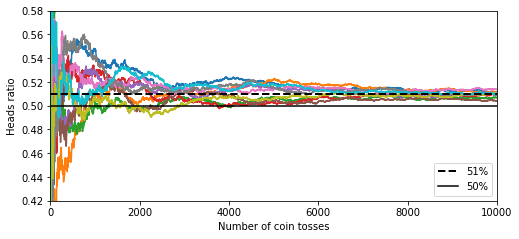

In [3]:
plt.figure(figsize = (8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], 'k--', linewidth = 2, label = '51%')
plt.plot([0, 10000], [0.5, 0.5], 'k-', label = '50%')
plt.xlabel('Number of coin tosses')
plt.ylabel('Heads ratio')
plt.legend(loc = 'lower right')
plt.axis([0, 10000, 0.42, 0.58])

plt.show()

同樣，假設構建了一個包含 1,000 個分類器的集成，每個分類器都只有 51％ 的機率是正確的（幾乎沒比隨機猜测好多少）。如果以大多數投票的類別作為預測結果，可以期待的準確率高達 75％ 。 但前提是：所有分類器都是完全獨立的，彼此的錯誤毫不相關。這顯然是不可能，因為它們都是在相同的數據上訓練的。它們很可能會犯相同的錯誤，所以也會有很多次大多數投給了錯誤的類別，導致集成的準確率有所降低。

當預測器盡可能獨立時，集成方法的效果最優。 獲得多種分類器的方法之一就是使用不同的算法進行訓練。 這會增加它們犯不同類型錯誤的機會，從而提高了集成的準確率。

以下是在 Scikit-Learn 中創建並訓練一個投票分類器，由三種不同的分類器所組成，訓練集是 moons dataset。

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [5]:
X, y = make_moons(n_samples = 500, noise = 0.30, random_state = 42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [8]:
log_clf = LogisticRegression(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
svm_clf = SVC(random_state = 42)

In [9]:
voting_clf = VotingClassifier(
    estimators = [('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting = 'hard')

In [10]:
voting_clf.fit(X_train, y_train)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

來看每個分類器在測試集上的準確率

In [11]:
from sklearn.metrics import accuracy_score

In [12]:
for clf in (log_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to s

上面結果，投票分類器略勝於所有單個分類器。

如果所有分類器都能夠估算出類別的機率（即有 predict_proba()），那麼可以將機率在所有單個分類器上平均，然後讓 Scikit-Learn 給出平均機率最高的類別作爲預測。這稱為**軟投票法（soft voting）**。 它通常比硬投票法的表現更優。因為它給予那些高度自信的投票更高的權重。

需要做的就是用 voting = 'soft' 替換 voting = 'hard'，並且確保所有分類器都可以估算出機率。預設情况下，SVC 是不行估算機率，因此需要將其超參數 probability 設置為 True（這會導致 SVC 使用交叉驗證來估算類別機率，減慢訓練速度，並會添加 predict_proba()）。

若將前面的程式修改成使用軟投票，會發現投票分類器的準確率達到 91％ 以上！

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
log_clf_soft = LogisticRegression(random_state = 42)
rnd_clf_soft = RandomForestClassifier(random_state = 42)
svm_clf_soft = SVC(probability = True,random_state = 42)

In [15]:
voting_clf_soft = VotingClassifier(
    estimators = [('lr', log_clf_soft), ('rf', rnd_clf_soft), ('svc', svm_clf_soft)],
    voting = 'soft')

In [16]:
voting_clf_soft.fit(X_train, y_train)

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...'rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
for clf in (log_clf_soft, rnd_clf_soft, svm_clf_soft, voting_clf_soft):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to s

# Bagging and Pasting

先前所獲得不同分類器的方法是使用不同的訓練算法。另外還有一種方法是每個預測器使用的算法都相同，但是在訓練集的不同隨機子集上進行訓練。

- 抽樣時，將樣本放回，這種方法稱為 *“bagging“*（bootstrap aggregating 的縮寫，也叫自舉匯聚法）(統計學中，放回重新抽樣稱為 bootstrapping）
- 抽樣時，不將樣本放回，這種方法稱為 *“pasting”*

bagging 和 pasting 都允許訓練實例在多個預測器中被多次抽樣，但只有 bagging 允許訓練實例被同一個預測器多次抽樣。

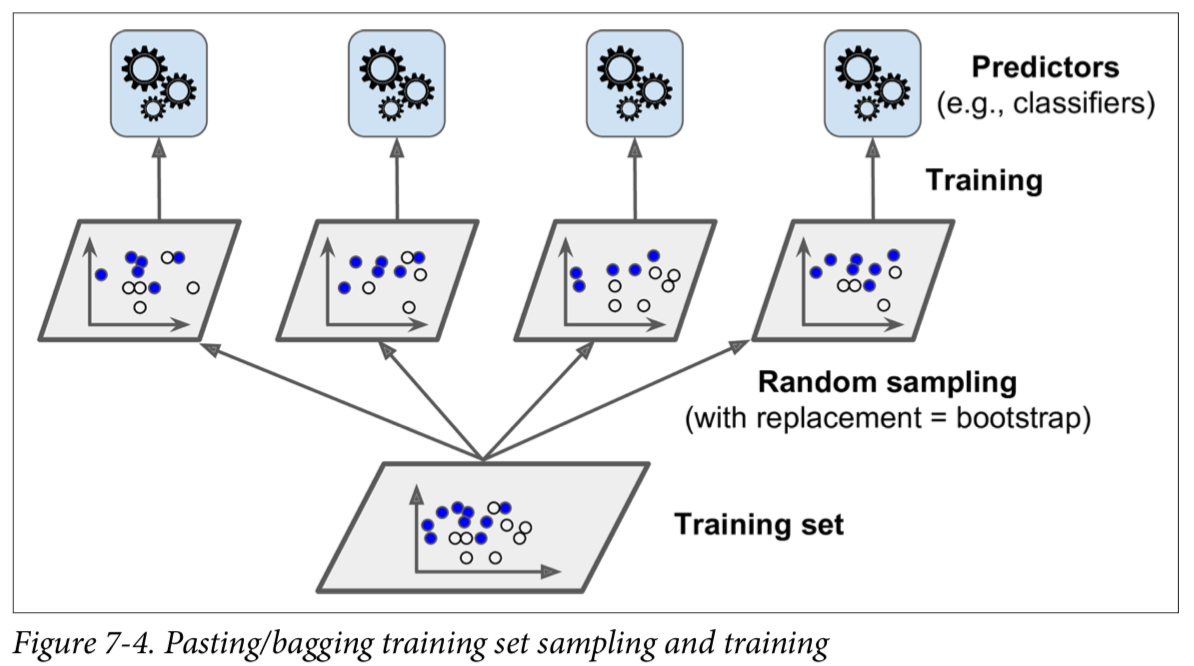

聚合函數（aggregation function）通常是*統計法（statistical mode）*（即最多數的預測好比硬投票分類器一樣）用於分類，或是平均法用於迴歸。 每個預測器單獨的偏差都高於在原始訓練集上訓練的偏差，但是透過聚合，同時降低了偏差和方差。 

總體來說，與直接在原始訓練及上訓練單個預測器相比，集成的偏差相近，但方差更低。

另外，預測器可以透過不同的 CPU 核心甚至不同的服務器进行並行訓練預測器。 同樣，預測也可以並行。

## Bagging and Pasting in Scikit-Learn

在 Scikit-Learn 中，可用 BaggingClassifier 進行 bagging 和 pasting（或 BaggingRegressor 用於迴歸)。

以下程式是訓練一個包含 500 個決策樹分類器的集成，每次隨機從訓練集中抽樣 100 個訓練實例進行訓練，然後放回（這是 bagging 的範例，如果要使用 pasting，只需要將 bootstrap = Fasle 即可）。參數 n_jobs 用來指示 Scikit-Learn 用多少 CPU 核心進行訓練和預測（-1 表示讓 Scikit-Learn 使用所有可用核心）。

max_samples 可以是整數，也可以在 0.0 到 1.0 之間設置，而每次抽樣的最大實例數量等於訓練集的大小乘以 max_samples。

max_samples : int or float, optional (default=1.0)     
    *The number of samples to draw from X to train each base estimator.*
- If int, then draw max_samples samples.
- If float, then draw max_samples * X.shape[0] samples.

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1)

In [21]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [22]:
y_pred = bag_clf.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print(accuracy_score(y_test, y_pred))

0.92


如果基礎分類器可以估算類別機率（也就是具備 predict_proba()），比如決策樹分類器，那 BaggingClassifier 自動執行的就是軟投票法，而不是硬投票法。

In [25]:
tree_clf = DecisionTreeClassifier(random_state = 42)

In [26]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [27]:
y_pred_tree = tree_clf.predict(X_test)

In [28]:
print(accuracy_score(y_test, y_pred_tree))

0.856


In [29]:
from matplotlib.colors import ListedColormap

In [30]:
def plot_decision_boundary(clf, X, y, axes = [-1.5, 2.5, -1, 1.5], alpha = 0.5, contour = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha = 0.3, cmap = custom_cmap)
    
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha = 0.8)
    
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', alpha = alpha)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', alpha = alpha)
    plt.axis(axes)
    plt.xlabel(r'$x_1$', fontsize = 18)
    plt.ylabel(r'$x_2$', fontsize = 18, rotation = 0)

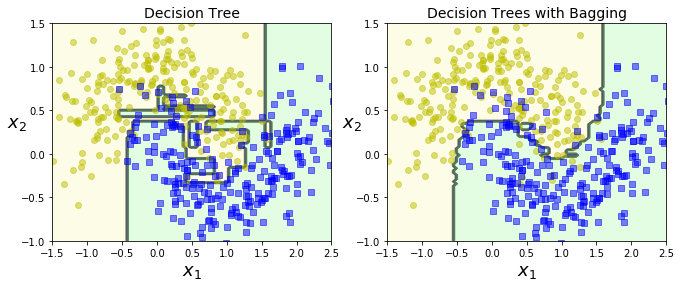

In [31]:
plt.figure(figsize = (11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title('Decision Tree', fontsize = 14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title('Decision Trees with Bagging', fontsize = 14)

plt.show()

上圖比較了兩種決策邊界，一個是單個的決策樹，另一個是由 500 個決策樹組成的 bagging 集成，均使用衛星資料集訓練完成。可以看出，集成預測的泛化效果會比單獨的決策樹要好一些，兩者的偏差相近，但集成的方差更小（兩邊訓練集上的錯誤數量差不多，但是集成的決策邊界更規則）。

Bootstrapping 給每個預測器的訓練子集引入了更高的多樣性，所以 bagging 比 pasting 的偏差略高，但這也意味著預測器之間的關聯度更低，所以集成的方差降低。總之，bagging 生成的模型通常更好。

如果有充足的時間和 CPU 資源，可以使用交叉驗證來對 bagging 和 pasting 的結果進行評估，再做出最合適的選擇。

## Out-of-Bag Evaluation

使用 bagging，對於任意給定的預測器，有些實例可能會被抽樣多次，而有些實例則可能根本不被抽中。BaggingClassifier 預設抽樣 $m$ 個訓練實例，然後放回樣本（bootstrap = True），其中 $m$ 是訓練集的大小。這意味着對每個預測器來說，平均只對 63％ 的訓練實例進行抽樣（隨著 $m$ 增長，這比率接近 $ 1-exp(-1) \approx 63.212%$） 。剩於的 37％ 未被抽樣的訓練實例稱為 **out-of-bag (oob)實例**。對所有預測器來說，這是不一樣的 37％。

由於預測器在訓練期間不會看到 oob 實例，正好可以用這些實例進行評估，從而不需要單獨的驗證集或是交叉驗證。將每個預測器在其 oob 實例上的評估結果進行平均，就可以得到對集成的評估。

在 Scikit-Learn 中，創建 BaggingClassifier 時設置 oob_score = True，就可以請求在訓練結束後自動進行 oob 評估。 

以下程式演示了這一點。透過變量 oob_score_ 可以得到最終的平均分數。

In [35]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42), n_estimators = 500, 
                            bootstrap = True, n_jobs = -1, oob_score = True, random_state = 40)

In [36]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=True,
         random_state=40, verbose=0, warm_start=False)

In [37]:
bag_clf.oob_score_

0.9013333333333333

根據上面評估結果，這個 BaggingClassifier 分類器很可能在測試集上達到約 90% 的準確率。可以利用實際測試集來驗證。

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
y_pred = bag_clf.predict(X_test)

In [41]:
accuracy_score(y_test, y_pred)

0.92

測試集上的準確率為 92%，算是非常接近。

每個訓練實例的 oob 決策函數可以透過變量 oob_decision_function_ 獲得。

oob_decision_function_ : array of shape = [n_samples, n_classes]

上面的例子中（基礎預測器具備 predict_proba()），決策函數返回的是每個實例的類別機率。

例如，oob  評估估計，第一個訓練實例有 68.25% 屬於正類的機率（以及 31.74% 的機率屬於負類）。 

In [39]:
# 輸出 bagging 的機率矩陣
bag_clf.oob_decision_function_

array([[0.31746032, 0.68253968],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.08379888, 0.91620112],
       [0.31693989, 0.68306011],
       [0.02923977, 0.97076023],
       [0.97687861, 0.02312139],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.71195652, 0.28804348],
       [0.83957219, 0.16042781],
       [0.97777778, 0.02222222],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97297297, 0.02702703],
       [0.95238095, 0.04761905],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.38947368, 0.61052632],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.96685083, 0.03314917],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.64804469, 0.35195531],
       [0.

# Random Patches and Random Subspaces

BaggingClassifier 也支持對特徵進行抽樣，可透過兩個超參數控制：max_features 和 bootstrap_featrues。工作方式和 max_samples 和 bootstrap 相同。只是抽樣對象不是實例，而是特徵。因此，每個預測器將用輸入特徵的隨機子集進行訓練。這對於處理高維輸入（如圖像）特別有用。

對訓練實例和特徵都進行抽樣，被稱為 **Random Patches 方法**。

而保留所有訓練實例（即 bootstrap = False 並且 max_samples = 1.0）但是對特徵進行抽樣（即 bootstrap_features = True 並且/或 max_features <1.0）這稱為**隨機子空間法（ Random Subspaces method）**。

對特徵抽樣給預測器帶來更大的多樣性，所以已略高一點的偏差換取了更低的方差。

# Random Forests

隨機森林是決策樹的集成，通常透過 Bagging（或有可能是 Pasting）方法訓練，訓練集大小透過 **max_samples 來設置**。 除了先創建一個  **BaggingClassifier** 然後將結果傳輸到 DecisionTreeClassifier，還有一種方法是使用 **RandomForestClassifier**，這樣更方便，對決策樹更優化（同樣，對於迴歸任務也有一個 **RandomForestRegressor**）。

如果想要對決策樹以外的方法進行 bag，BaggingClassifier 還是有用的。

以下是使用所有可用的 CPU 核心訓練具有 500 棵樹（每顆樹限制為最多 16 個節點）的隨機森林分類器。

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1, random_state = 42)

In [42]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [43]:
y_pred_rf = rnd_clf.predict(X_test)

In [44]:
np.sum(y_pred == y_pred_rf) / len(y_pred)    # almost identical predictions

0.976

除了少數例外，**RandomForestClassifier** 具有 **DecisionTreeClassifier** 的所有超參數（用於控制樹的生長方式），以及 **BaggingClassifier** 的所有超參數（用來控制集成本身）。

有幾個值得注意的例外：沒有 splitter（強制為 random），沒有 presort（強制為 False），沒有 max_samples（強制為 1.0），沒有 base_estimator（強制為 DecisionTreeClassifier 與給定的超參數）。

隨機森林算法在樹的生長上引入更多的随機性：分裂節點時不再是搜索最好的特徵，而是在一個隨機生成的特徵子集中搜索最好的特徵。這導致決策樹具有更大的多樣性，用更高的偏差換取更低的方差，最終還是產生一個整體性更優的模型。 

以下 BaggingClassifier 大致與之前的 RandomForestClassifier 相同。

In [45]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 16, random_state = 42),
    n_estimators = 500, 
    max_samples = 1.0, 
    bootstrap = True, 
    n_jobs = -1, 
    random_state = 42
)

In [46]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='random'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=500, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [47]:
y_pred = bag_clf.predict(X_test)

In [48]:
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

## Extra-Trees

在隨機森林裏單顆樹生長過程中，每個節點在分裂時僅考慮到一個隨機子集包含的特徵。如果對每個特徵使用随機閾值，而不是搜索得出的最佳閾值（如常規決策樹），則可能讓決策樹生長得更加隨機。

這種極端隨機的決策樹所組成的森林，被稱為**極端隨機樹集成（Extremely Randomized Trees ensemble）（或簡稱 Extra-Trees）**。同樣，它也是以更高的偏差換取了更低的方差。Extra-Trees 訓練起來比常規隨機森林要快很多，因為在每個節點上找到每個特徵的最佳閾值是決策樹生長中最耗時的任務之一。

使用 Scikit-Learn 的 ExtraTreesClassifier 可以創建一個 Extra-Trees 分類器。它的 API 與 RandomForestClassifier 相同。同樣，ExtraTreesRegressor 與 RandomForestRegressor 具有相同的API。

通常，很難與先知道一個 RandomForestClassifier 是否比一個 ExtraTreesClassifier 更好或更差。唯一方法是兩種都嘗試一遍，然後使用交叉驗證（還需要使用網格搜尋調整超參數）進行比較。

## Feature Importance

如果查看單個決策樹會發現，**重要特徵更可能出現在更靠近根節點的位置，而不重要的特徵通常會出現在靠近葉節點的位置（甚至根本不出現）**。因此，可以透過計算一個特徵在森林中所有樹上的**平均深度**，可以估算出一個特徵的重要程度。

Scikit-Learn 在訓練結束後自動計算每個特徵的重要性。 透過變量 feature_importances_ 可以查詢到這個計算結果。

以下是在鳶尾花數據集上訓練一個 **RandomForestClassifier**，並輸出每個特徵的重要性。

In [49]:
from sklearn.datasets import load_iris

In [50]:
iris = load_iris()

In [51]:
rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)

In [52]:
rnd_clf.fit(iris['data'], iris['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
rnd_clf.feature_importances_

array([0.09491424, 0.0243964 , 0.44944022, 0.43124913])

In [53]:
for name,score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name,score)

sepal length (cm) 0.09491424377329478
sepal width (cm) 0.024396402024621403
petal length (cm) 0.44944022333627087
petal width (cm) 0.4312491308658128


看起來最重要的特徵是**花瓣**長度（44％）和寬度（43％），而**萼片**的長度和寬度相比較不重要（分别為 9％ 和 2％）。

同樣，如果在 MNIST 數據集上訓練隨機森林分類器，並繪製其每個像素的重要性，可以得到以下所示的圖像。

In [55]:
from sklearn.datasets import fetch_mldata

In [58]:
#mnist = fetch_mldata('MNIST original')      # 書中使用的但無法下載
mnist = fetch_mldata('MNIST original', transpose_data = True, data_home = 'datasets')

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [59]:
rnd_clf = RandomForestClassifier(random_state = 42)

In [60]:
rnd_clf.fit(mnist['data'], mnist['target'])

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot, interpolation = 'nearest')
    plt.axis('off')

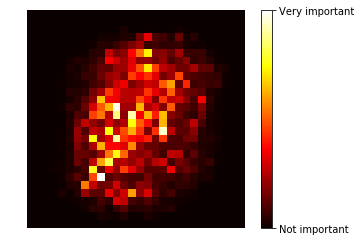

In [62]:
plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks = [rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

想要快速了解什麼是真正重要的特徵，隨機森林是一個非常便利的方法，特別是當需要執行特徵選擇的時候。

# Boosting

**Boosting**（最初稱為假設增强（hypothesis boosting））指的是可以將幾個弱學習器結合成一個強學習器的任意集成方法。大多數的 boosting 方法的思路是循環去訓練分類器，每一次都對其前序做出一些改正。現今已有很多的 boosting 方法，但最著名的就是 **Adaboost**（**自適應提升法**，是 Adaptive Boosting 的簡稱） 和 **Gradient Boosting**（**梯度提升**）。

## AdaBoost

新預測器對其前序進行糾正的辦法之一，就是更多地關注前序擬合不足的訓練實例。 從而使新的預測器不斷地越來越關注於比較難的實例。這就是 AdaBoost使用的技術。

例如，要構建一個 Adaboost 分類器，先要訓練一個基礎分類器（例如一個決策樹），用它來對訓練集做預測，然後對錯誤分類的訓練實例增加其相對權重。 接著，使用這個最新的權重對第二個分類器進行訓練，然後再次對訓練集進行預測，繼續更新權重，不斷循環向前，如下圖。

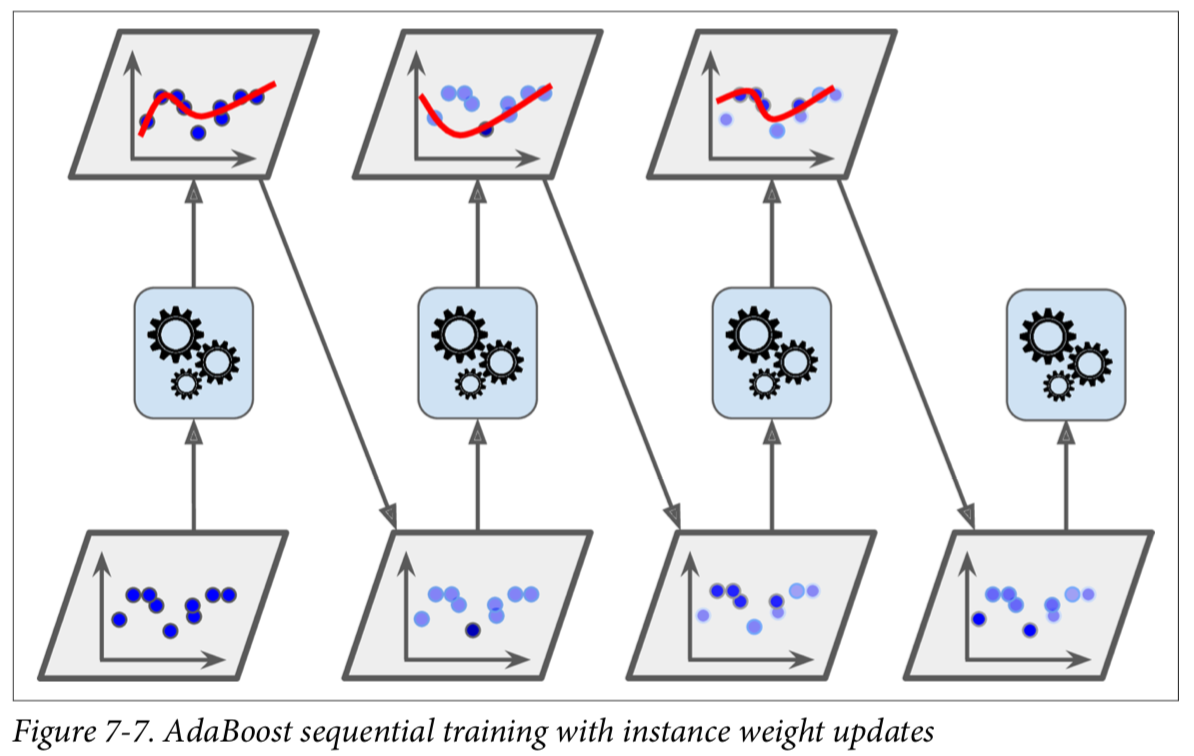

/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jasonch/anaconda3/envs/tf_cpu/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/jasonc

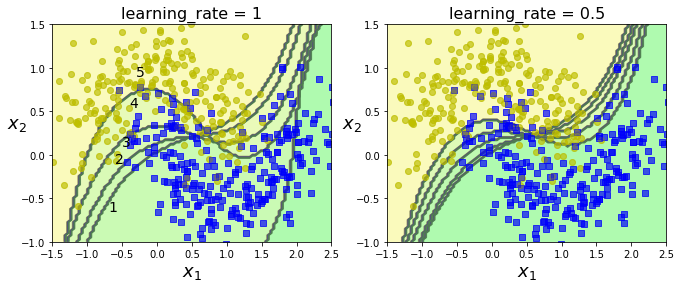

In [63]:
m = len(X_train)

plt.figure(figsize = (11, 4))

for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel = 'rbf', C = 0.05, random_state = 42)
        svm_clf.fit(X_train, y_train, sample_weight = sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha = 0.2)
        plt.title('learning_rate = {}'.format(learning_rate), fontsize = 16)
    if subplot == 121:
        plt.text(-0.7, -0.65, '1', fontsize = 14)
        plt.text(-0.6, -0.10, '2', fontsize = 14)
        plt.text(-0.5,  0.10, '3', fontsize = 14)
        plt.text(-0.4,  0.55, '4', fontsize = 14)
        plt.text(-0.3,  0.90, '5', fontsize = 14)

plt.show()

上圖顯示了 moons 數據集上五個連續預測器的決策邊界（在此例中，每個預測器都是使用 RBF 核函數的高度正則化的 SVM 分類器）。 第一個分類器產生了許多錯誤實例，所以這些實例的權重得到提升。 因此第二個分類器在這些實例上的表現有所提升，然後第三個、第四個....等等。

右圖代表了相同的預測器序列，但在學習率減半（即，每次迭代僅提升一半錯誤分類的實例權重）。可以看出，AdaBoost 這種依序循環的學習技術和梯度下降有些異曲同工之妙，差別只在於，不再是調整單個預測器的參數使成本函數最小化，而是不斷在集成中加入預測器，使模型越來越好。

一旦所有預測器訓練完成，集成整體做出預測時就跟 bagging 或 pasting 方法一樣，除非預測器有不同的權重，因為它們總體準確率是基於加權後的訓練集。

*上面只是舉例說明，對於 AdaBoost 來說，SVM 通常不是很好的基礎預測器，因為它們很慢，並且由於使用了 AdaBoost，很容易不穩定。*

這種依序學習技術有一个重要的缺點：它不能並行（或僅部分地），因為每個預測器只能在先前的預測器訓練完成並評估之後才能被訓練。 因此，它不會像bagging 和 pasting 那樣可以擴展。

來看 AdaBoost 算法。 每個實例的權重 $w^{(i)}$ **最初**設置為 $\frac{1}{m}$。 第一個預測器訓練後，計算其加權誤差率 $r_1$ ; 可見以下公式:

**Weighted error rate of the jth predictor：**

$$ r_j = \frac{\sum_{\underset{\hat y_j^{(i)} \ne y^{(i)}}{i = 1}}^m w^{(i)}}{\sum_{i = 1}^m w^{(i)}} $$

$$ where \; \hat y_j^{(i)} \; is \; the \; j^{th} \; predictor’s \; prediction\; for\; the\; i^{th}\; instance. $$

預測器的權重 $a_j$ 透過 Predictor weight 公式計算，其中 $\eta$ 是學習率超參數（預設為 1）。（初始的 AdaBoost 算法不使用學習率超參數）。預測器的準確率越高，其權重就越高。如果只是隨機猜測，則其權重接近於 0。但是，如果大部分情況下它都是錯的（也就是準確率比隨機猜測還低），那它的權重為負。

**Predictor weight：**

$$ \alpha_j = \eta log \frac{1 - r_j}{r_j} $$

接下來，使用 Weight update rule 公式，對實例的權重進行更新，也就是提升被錯誤分類的實例的權重。

**Weight update rule：**

$$ for i = 1, 2, ⋯, m $$

$$ w^{(i)} \gets \begin{cases} w^{(i)}&(\hat y_j^{(i)} = y^{(i)}) \cr w^{(i)}exp(\alpha_j) &(\hat y_j^{(i)} \ne y^{(i)}) \end{cases}$$

然後將所有實例的權重歸一化（即除以 $\sum_^ w^{(i)}$）。

最後，使用更新後的權重訓練一個新的訓練器，然後重複整個過程（計算新預測器的權重，更新實例權重，然後對另一個預測器進行訓練，等等）。當達到所需數量的預測器或是得到完美的預測器時，算法停止。

預測的時候，AdaBoost 就是簡單地計算所有預測器的預測結果，並使用預測器權重 $\alpha_j$ 對它們進行加權。最後，得到大多數加權投票的類別就是預測器給出的預測類別，可見 AdaBoost predictions 公式。

**AdaBoost predictions：**

$$ \hat y(x) = \underset{k}{argmax} \sum_{\underset{\hat y_j(x) = k}{j=1}}^N \alpha_j $$

$$where\; N \;is\; the\; number\; of \;predictors.$$

Scikit-Learn 使用的其實是 AdaBoost 的一個多分類版本，叫做 **SAMME**（基於多類指數損失函數的逐步添加模型 Stagewise Additive Modeling using a Multiclass Exponential loss function）。**當只有兩個類別時，SAMME 相當於 AdaBoost**。此外，如果預測器可以估計類別機率（即有predict_proba()），Scikit-Learn 會使用一種 SAMME 的變體，稱為 **SAMME.R**（R 代表“real”），它依賴於類別的機率而不是類別預測，通常表現更好。

以下是使用 Scikit-Learn 的 **AdaBoostClassifier**（還有一個**AdaBoostRegressor**）訓練一個 AdaBoost 分類器，是基於 200 個*單層決策樹（decision stump）*。

單層決策樹就是 **max_depth = 1** 的決策樹，換句話說，就是一個決策節點加上兩個葉節點。 這是 AdaBoostClassifier 的預設使用的基礎估算器。

In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), 
    n_estimators = 200,
    algorithm = 'SAMME.R', 
    learning_rate = 0.5, 
    random_state = 42)

In [66]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=42)

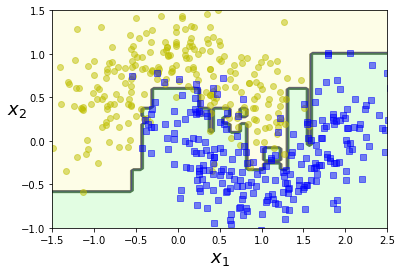

In [67]:
plot_decision_boundary(ada_clf, X, y)

如果 AdaBoost 集成過度擬合訓練集，可以嘗試減少估算器的數量，或者提高基礎估算器的正則化程度。

## Gradient Boosting

**Gradient Boosting** 就像 AdaBoost 一樣，**也是逐步在集成中添加預測器，每一個都對其前序做出修正**。 不同之處在於，不像 AdaBoost 在每個迭代中調整實例權重，而是**讓新的預測器針對前一個預測器的残差進行擬合**。

透過一個簡單的迴歸範例，使用決策樹作為基礎預測器（Gradient Boosting 也適用於迴歸任務）。 這被稱為**梯度樹提升**（Gradient Tree Boosting）或**梯度提升迴歸樹**（Gradient Boosted Regression Trees）（GBRT）。 

首先，在訓練集上擬合一個 DecisionTreeRegressor。

In [69]:
# 帶有雜訊的二次訓練集
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
tree_reg1 = DecisionTreeRegressor(max_depth = 2)

In [71]:
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

針對第一個預測器的殘差，訓練第二個 DecisionTreeRegressor。

In [72]:
y2 = y - tree_reg1.predict(X)

In [73]:
tree_reg2 = DecisionTreeRegressor(max_depth = 2)

In [74]:
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

針對第二個預測器的殘差，訓練第三個 DecisionTreeRegressor。

In [75]:
y3 = y2 - tree_reg2.predict(X)

In [76]:
tree_reg3 = DecisionTreeRegressor(max_depth = 2)

In [77]:
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

有了一個包含三顆樹的集成，將所有樹的預測相加，從而對新實例進行預測。

In [79]:
X_new = np.array([[0.8]])

In [80]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [81]:
y_pred

array([0.75026781])

In [82]:
def plot_predictions(regressors, X, y, axes, label = None, style = 'r-', data_style = 'b.', data_label = None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label = data_label)
    plt.plot(x1, y_pred, style, linewidth = 2, label = label)
    
    if label or data_label:
        plt.legend(loc = 'upper center', fontsize = 16)
    
    plt.axis(axes)

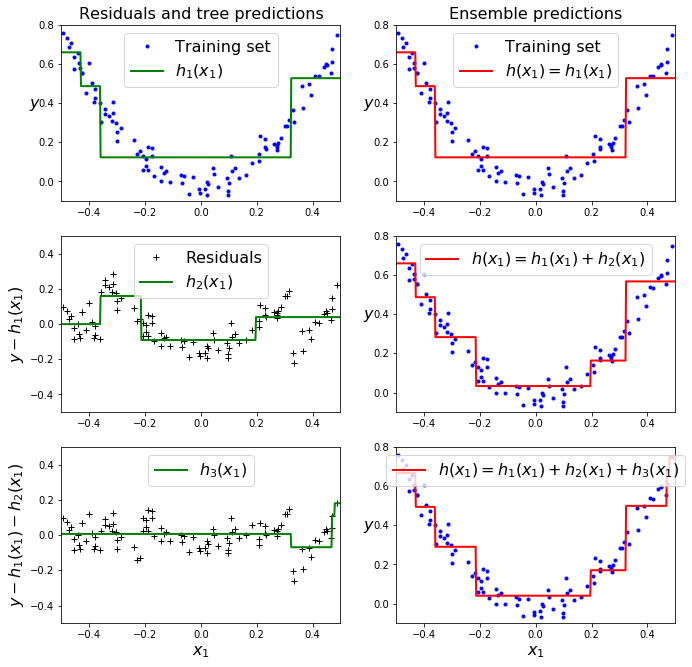

In [83]:
plt.figure(figsize = (11, 11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes = [-0.5, 0.5, -0.1, 0.8], label = '$h_1(x_1)$', style = 'g-', data_label = 'Training set')
plt.ylabel('$y$', fontsize = 16, rotation = 0)
plt.title("Residuals and tree predictions", fontsize = 16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes = [-0.5, 0.5, -0.1, 0.8], label = '$h(x_1) = h_1(x_1)$', data_label = 'Training set')
plt.ylabel('$y$', fontsize = 16, rotation = 0)
plt.title('Ensemble predictions', fontsize = 16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes = [-0.5, 0.5, -0.5, 0.5], label = '$h_2(x_1)$', style = 'g-', data_style = 'k+', data_label = 'Residuals')
plt.ylabel('$y - h_1(x_1)$', fontsize = 16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes = [-0.5, 0.5, -0.1, 0.8], label = '$h(x_1) = h_1(x_1) + h_2(x_1)$')
plt.ylabel('$y$', fontsize = 16, rotation = 0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes = [-0.5, 0.5, -0.5, 0.5], label = '$h_3(x_1)$', style = 'g-', data_style = 'k+')
plt.ylabel('$y - h_1(x_1) - h_2(x_1)$', fontsize = 16)
plt.xlabel('$x_1$', fontsize = 16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes = [-0.5, 0.5, -0.1, 0.8], label = '$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$')
plt.xlabel('$x_1$', fontsize = 16)
plt.ylabel('$y$', fontsize = 16, rotation = 0)

plt.show()

上圖左側表示這三顆樹單獨的預測，右側表示集成的預測。

- 第一列中，集成只有一棵樹，所以預測與第一顆樹的預測完全相同。
- 第二列中，是在第一顆樹的殘差上訓練的一顆新樹，集成的預測等於前面兩棵樹的預測之和。
- 第三列又有一顆在第二棵樹的殘差上訓練的新樹，集成的預測隨著新樹的添加逐漸變好。

訓練 GBRT 集成有一種更簡單的方法，就是使用 Scikit-Learn 的 **GradientBoostingRegressor**。與 **RandomForestRegressor** 類似，它具有：

* 控制決策樹增長的超參數（例如，max_depth，min_samples_leaf等）

* 控制集合訓練的超參數，例如樹的数量（n_estimators）。

以下是創建與上面相同的集成。

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

In [85]:
gbrt = GradientBoostingRegressor(
    max_depth = 2, 
    n_estimators = 3, 
    learning_rate = 1.0, 
    random_state = 42
)

In [86]:
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

learning_rate 超參數對每棵的貢獻進行縮放。如果將其設置為低的值，例如 0.1，則需要更多的樹來擬合訓練集，但預測的泛化效果通常會更好。 這是一種被稱為*收縮（shrinkage）* 的正則化技術。

In [87]:
gbrt_slow_1 = GradientBoostingRegressor(
    max_depth = 2, 
    n_estimators = 3, 
    learning_rate = 0.1, 
    random_state = 42
)

In [88]:
gbrt_slow_1.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [89]:
gbrt_slow_2 = GradientBoostingRegressor(
    max_depth = 2, 
    n_estimators = 200, 
    learning_rate = 0.1, 
    random_state = 42
)

In [90]:
gbrt_slow_2.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

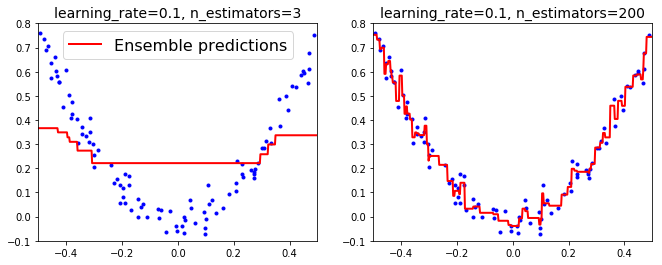

In [92]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt_slow_1], X, y, axes = [-0.5, 0.5, -0.1, 0.8], label = 'Ensemble predictions')
plt.title('learning_rate={}, n_estimators={}'.format(gbrt_slow_1.learning_rate, gbrt_slow_1.n_estimators), fontsize = 14)

plt.subplot(122)
plot_predictions([gbrt_slow_2], X, y, axes = [-0.5, 0.5, -0.1, 0.8])
plt.title('learning_rate={}, n_estimators={}'.format(gbrt_slow_2.learning_rate, gbrt_slow_2.n_estimators), fontsize=14)

plt.show()

上圖顯示用低學習率訓練的兩個 GBRT 集成，
- 左側擬合訓練集的樹數量不足，
- 右側擬合訓練集的樹數量過多，導致過度擬合。

要找到樹的最佳數量，可以使用**早期停止法（Early stopping）**。 簡單的實現方法就是使用 staged_predict()：它在訓練的每個階段（一棵樹時，兩棵樹時，等等）都對集成的預測返回一個迭代器。

以下是訓練帶有 120 棵樹的 GBRT 集成，然後測量每個訓練階段的**驗證誤差**，從而找到樹的最優數量，最後使用最優樹數重新訓練一個 GBRT 集成。

In [93]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 49)

In [95]:
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120, random_state = 42)

In [96]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=120, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]

In [98]:
bst_n_estimators = np.argmin(errors)

In [99]:
gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators = bst_n_estimators, random_state = 42)

In [100]:
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
min_error = np.min(errors)
print(min_error)

0.002712853325235463


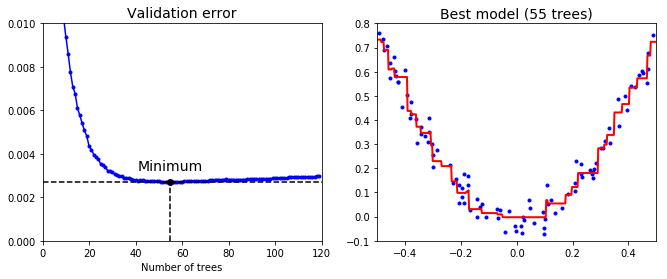

In [102]:
plt.figure(figsize = (11, 4))

plt.subplot(121)
plt.plot(errors, 'b.-')
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], 'k--')
plt.plot([0, 120], [min_error, min_error], 'k--')
plt.plot(bst_n_estimators, min_error, 'ko')
plt.text(bst_n_estimators, min_error * 1.2, 'Minimum', ha = 'center', fontsize = 14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel('Number of trees')
plt.title('Validation error', fontsize = 14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes = [-0.5, 0.5, -0.1, 0.8])
plt.title('Best model (%d trees)' % bst_n_estimators, fontsize = 14)

plt.show()

驗證錯誤顯示在上圖的左側，最佳模型的預測顯示在右側。

實際上，要實現早期停止法，不一定需要先訓練大量的樹，然後再回頭找最優的數字，還可以真的提前停止訓練。可以透過設置 **warm_start = True**，當fit() 被調用時，Scikit-Learn 會保留現有的樹，從而允許增量訓練。

以下是會在驗證誤差連續 5 次迭代未改善前，直接停止訓練。

In [103]:
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True, random_state = 42)

In [104]:
min_val_error = float('inf')
error_going_up = 0

for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break                    # early stopping

In [105]:
print(gbrt.n_estimators)

61


In [106]:
print('Minimum validation MSE:', min_val_error)

Minimum validation MSE: 0.002712853325235463


GradientBoostingRegressor 還可以支持超參數 subsample，指定用於訓練每棵樹的實例的比例。例如，如果 subsample = 0.25，則每棵樹在 25％ 的隨機選擇的實例進行訓練。 這也是用更高的偏差換取了更低的方差。同時它還大大加快了訓練速度。 這種技術被稱為*随机梯度提升（Stochastic Gradient Boosting）*。

Gradient Boosting 也可以使用其他成本函數，透過超參數 loss 來控制。

# Stacking

Stacking（又稱作 stacked generalization）。它認為，與其使用一些簡單的函數（比如硬投票）來聚合集成中所有預測器的預測，為何不訓練一個模型來執行這個聚合？

下圖顯示了在新實例上執行迴歸任務的這樣一個集成。

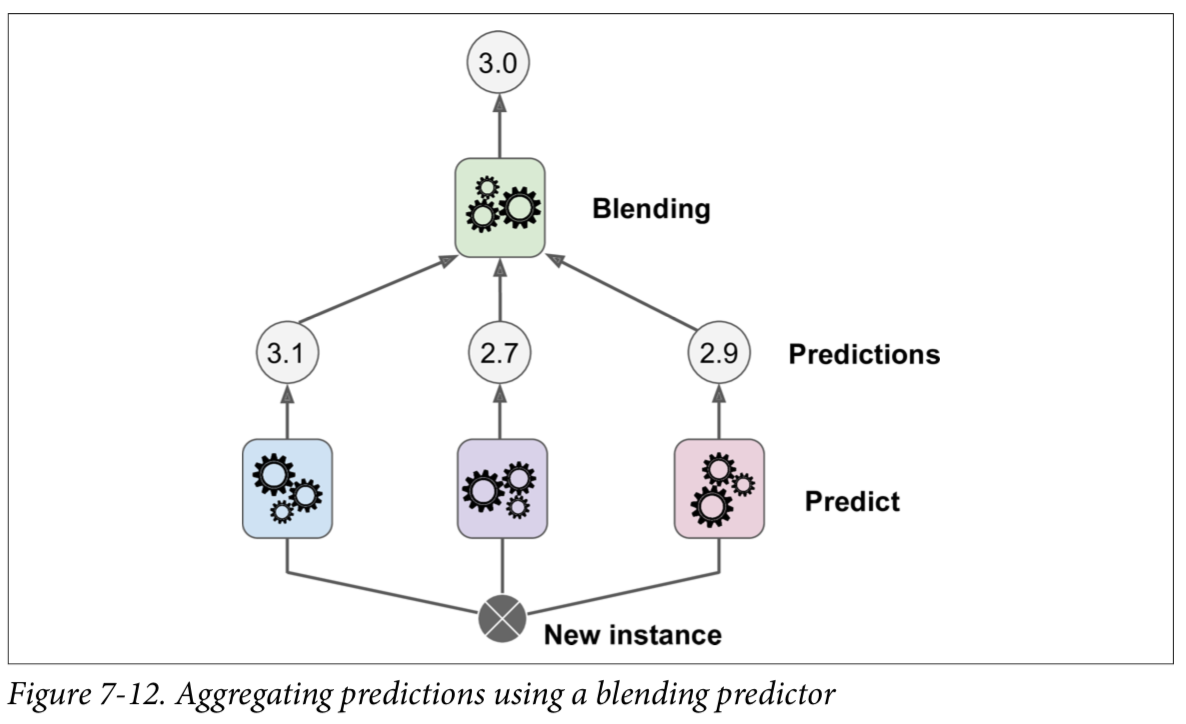

底部的三個預測器分別預測了不同的值（3.1, 2.7, 2.9），然後最終的預測器（稱為 blender, or a meta learner）將這些預測作爲輸入，進行最終預測（3.0）。

訓練混合器的常用方法是使用留存集（hold-out set）（或使用折外（out-of-fold）預測也可以，某些情況下，這才被稱為 stacking，而使用留存即被稱為 blending。但對多數來說，這兩者是同義詞。）。

首先，訓練集分为兩個子集。 第一個子集用於訓練第一層中的預測器（有三個）。

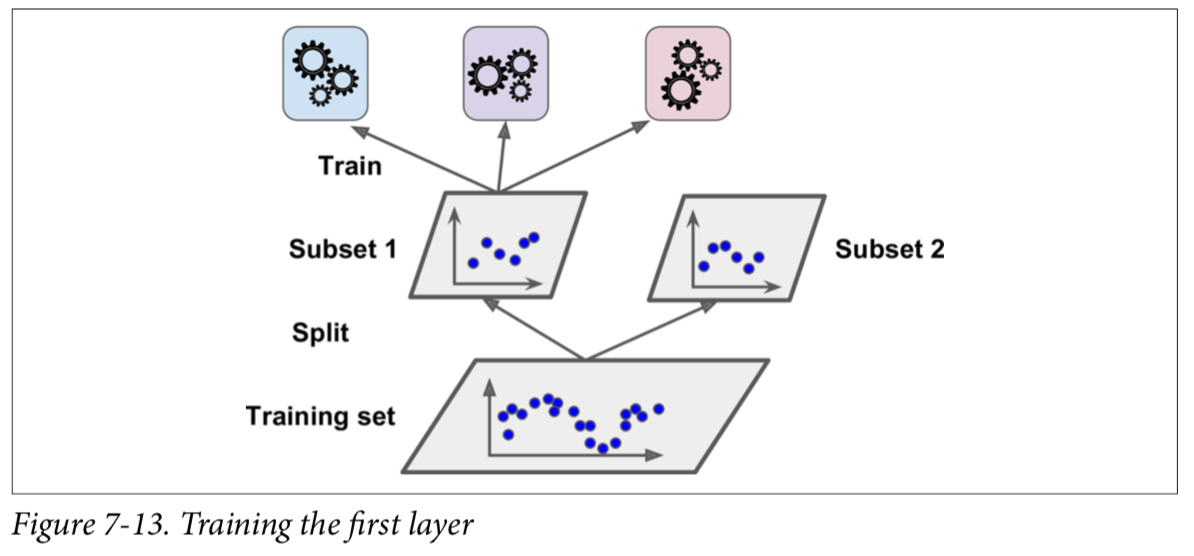

接下来，用第一層的預測器在第二個（hold-out）子集上進行預測（見下圖）。 因為預測器在訓練時從未見過這些實例，可以確保預測是乾淨（clean）的。

現在，對於 hold-out set 中的每個實例都有三個預測值。可以使用這些預測值作為**輸入特徵**創建一個**新的訓練集**（新的訓練集有三個維度），並保留目標值。在這個新的訓練集上訓練 blender，讓它學習根據第一層的預測結果來預測目標值。

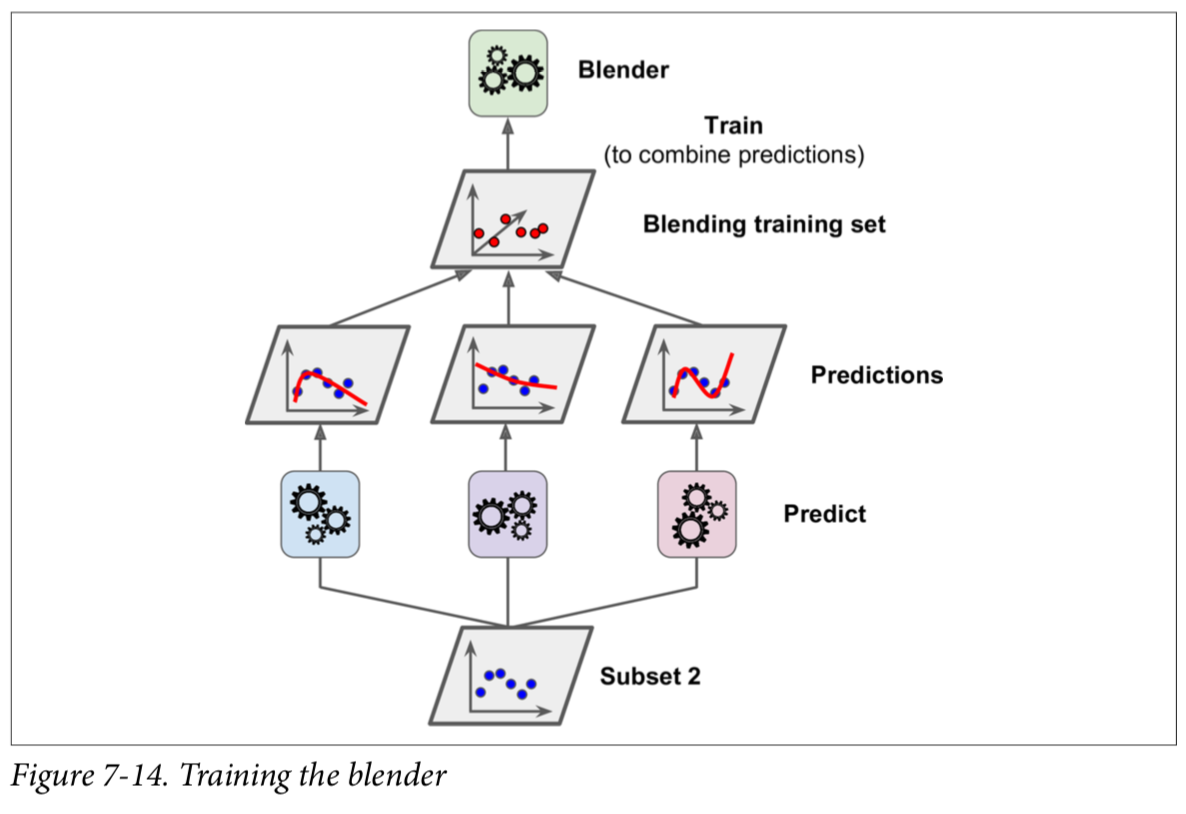

透過這種方法可以訓練多種不同的 blender（例如，一個使用線性迴歸，另一個使用隨機森林迴歸，等等），可以得到一個 layer of blenders。

訣竅是將訓練集分成三個子集：
- 第一個用於訓練第一層，
- 第二個用來創造訓練第二層的新訓練集（使用第一層的預測）
- 第三個用來創建第三層的新訓練集（使用第二層的預測）。

一旦訓練完成，可以按順序遍歷每層來對新實例進行預測，如下圖所示。

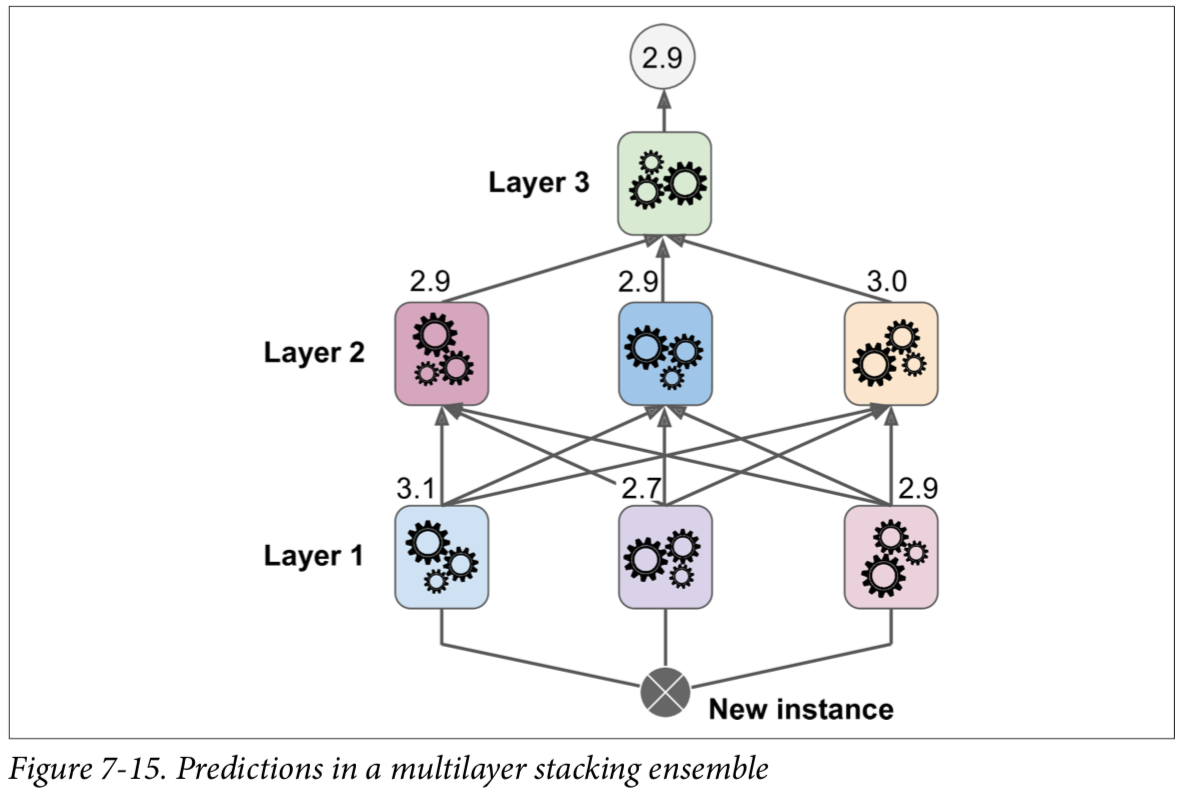

Scikit-Learn 不支持直接堆叠。也可以使用 Brew 等開源實現方案 （可在[https://github.com/viisar/brew] 獲得）。

以下是在作者 github 中的範例

# Using XGBoost

In [107]:
try:
    import xgboost
except ImportError as ex:
    print('Error: the xgboost library is not installed.')
    xgboost = None

Error: the xgboost library is not installed.


In [108]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state = 42)
    xgb_reg.fit(X_train, y_train)
    
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print('Validation MSE:', val_error)

In [109]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set = [(X_val, y_val)], 
                early_stopping_rounds = 2
               )
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    print('Validation MSE:', val_error)

In [110]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

49.3 ns ± 2.58 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [111]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

18.3 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 心得

先前就有聽聞過 boosting 的方法，但對於其中的內容不是很清楚，而且也搞不太懂裡面方法各自的差異，透過這章作者的講解後，對於每種 boosting 有了清楚的認知。透過幾個範例程式，也對於 Scikit-Learn 中使用的 api 也有較完整地理解，對於各自重要的超參數，也都明瞭該意義。基本上，作者算是用了很淺顯易懂的文筆，將這些概念都表達得清楚，所以可以讓讀者很容易的理解該內容。